In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fifa_dataset.csv',index_col=1)
df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


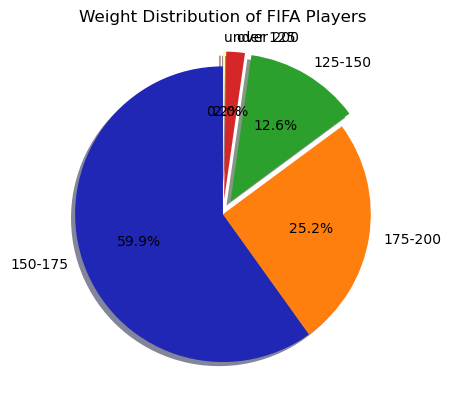

In [3]:
myDF = df.copy()
myDF['Weight'] = myDF['Weight'].str.replace('lbs','').astype(float)
myDF.loc[myDF['Weight'] <= 125 ,'Weight'] = 0
myDF.loc[myDF['Weight'] >= 200 ,'Weight'] = 9999
myDF.loc[(myDF['Weight'] >= 175) & (myDF['Weight'] <= 200) ,'Weight'] = 1
myDF.loc[(myDF['Weight'] >= 150) & (myDF['Weight'] <= 175) ,'Weight'] = 2
myDF.loc[(myDF['Weight'] >= 125) & (myDF['Weight'] <= 150) ,'Weight'] = 3
myDF.loc[myDF['Weight'] == 0 ,'Weight'] = 'under 125'
myDF.loc[myDF['Weight'] == 9999 ,'Weight'] = 'over 200'
myDF.loc[myDF['Weight'] == 1 ,'Weight'] = '175-200'
myDF.loc[myDF['Weight'] == 2 ,'Weight'] = '150-175'
myDF.loc[myDF['Weight'] == 3 ,'Weight'] = '125-150'

weightCount =myDF['Weight'].value_counts()

explode = (0.0, 0.0, 0.1, 0.1,0.1,)



colors = ["#1f27b4", "#ff7f0e", "#2ca02c", "#d62728", "#FFaF","#23455e","#F2FF","#52FF"]
plt.pie(weightCount, labels=weightCount.index,  colors=colors,
        autopct='%1.1f%%', shadow=True,explode=explode, startangle=90,
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 0,
                      'antialiased': True})
plt.title("Weight Distribution of FIFA Players")
plt.show()


C:\Users\ar-na\AppData\Local\Temp\ipykernel_26920\1959945281.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  myCor = df.corr()


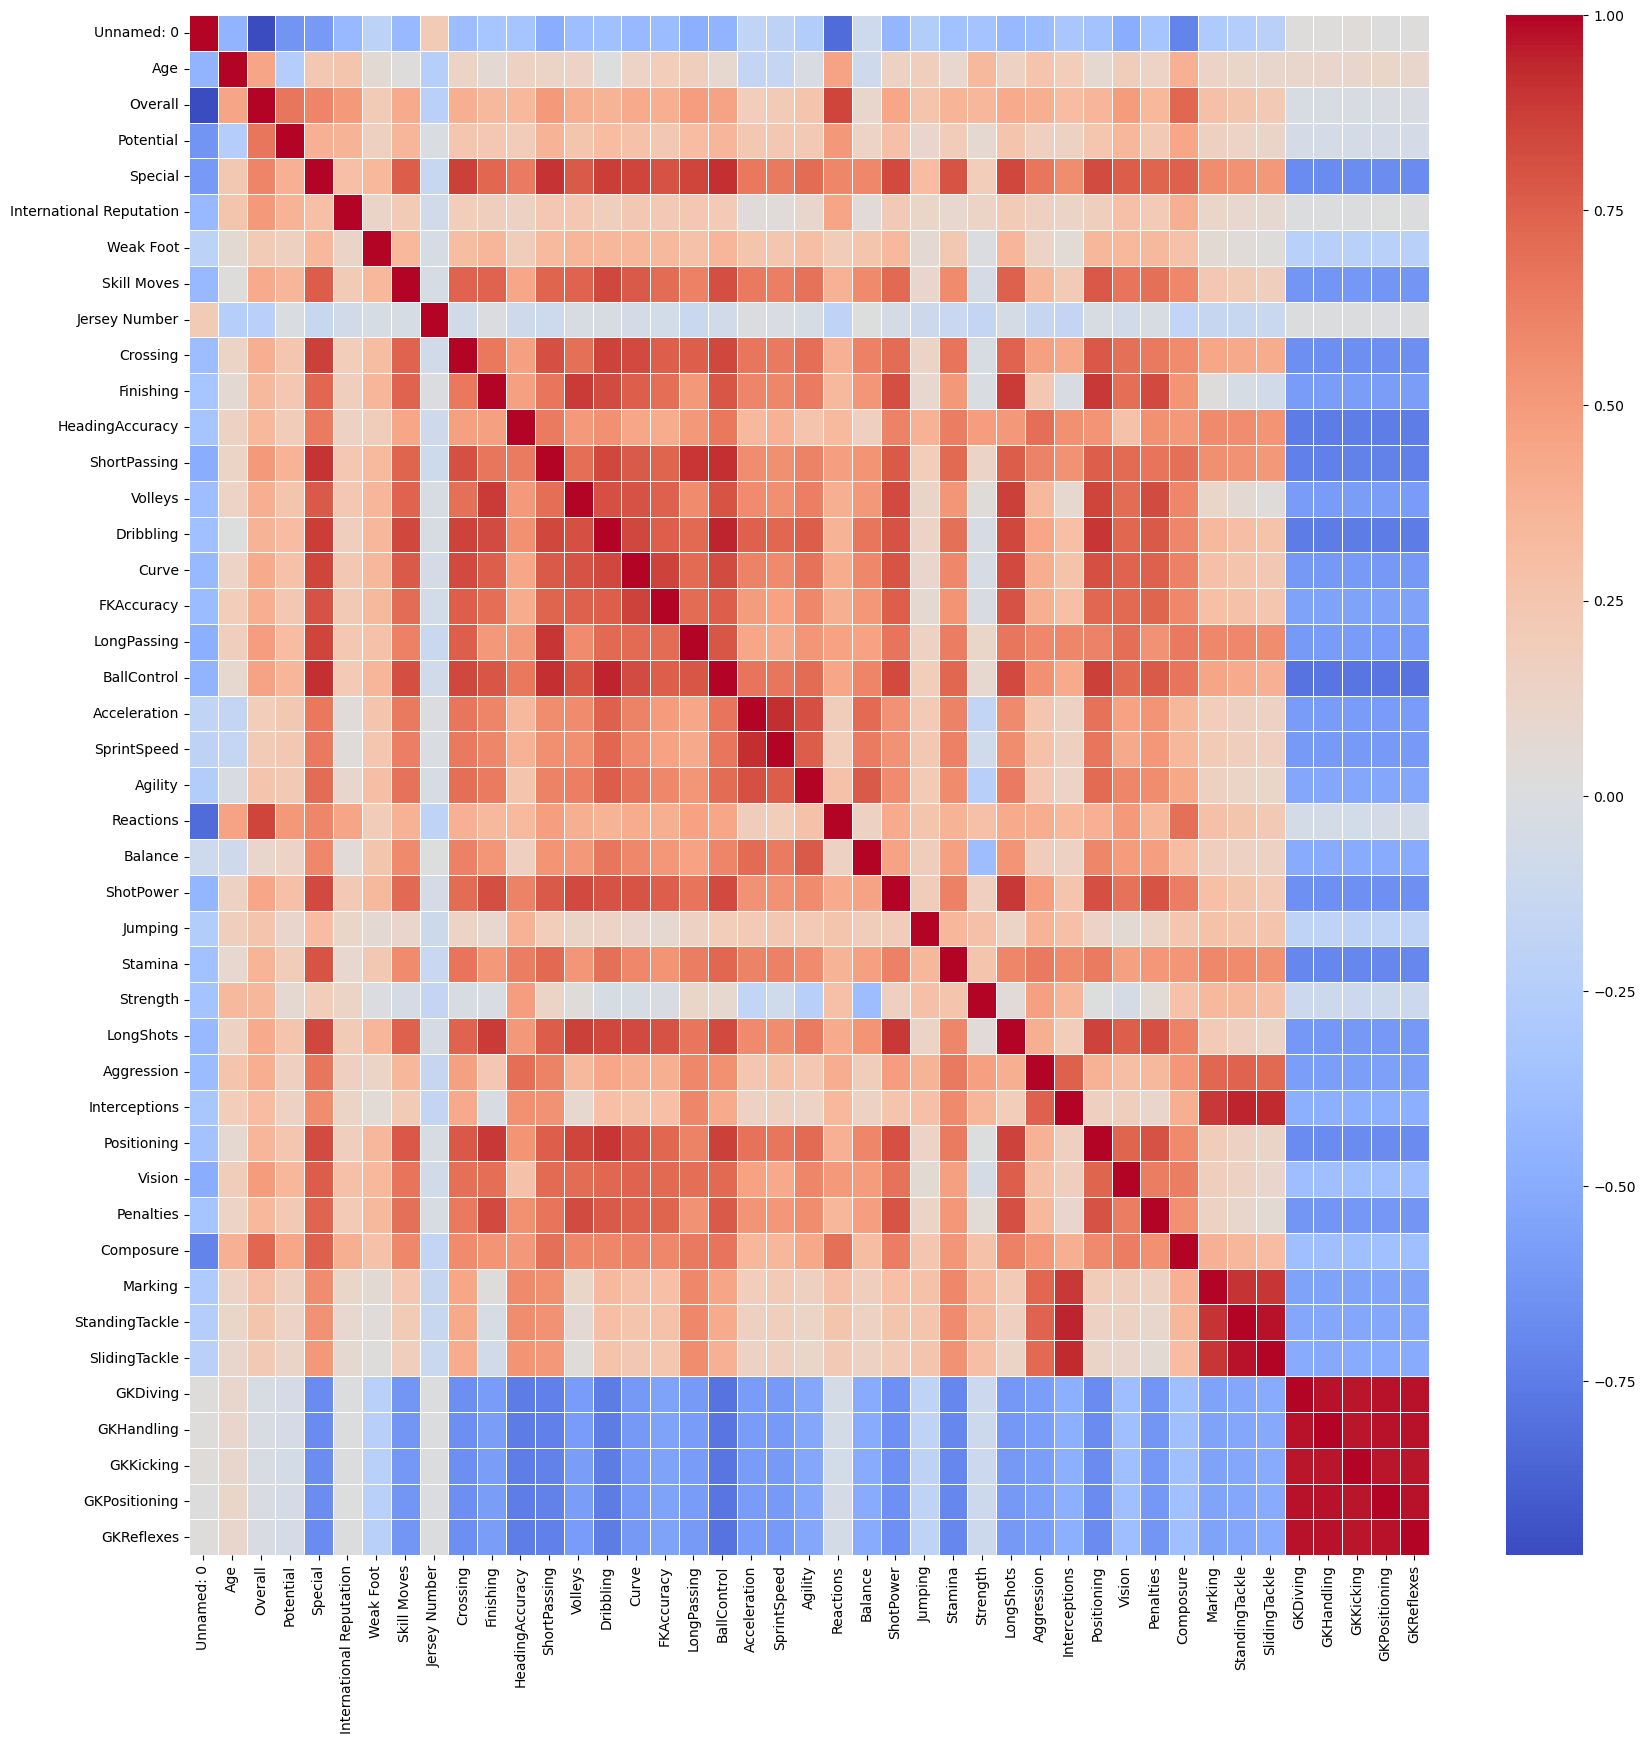

In [4]:
df.head().T
myCor = df.corr()
plt.figure(figsize = (20,20))
heatmap = sns.heatmap(myCor, annot=False, cmap="coolwarm", linewidth=.5)


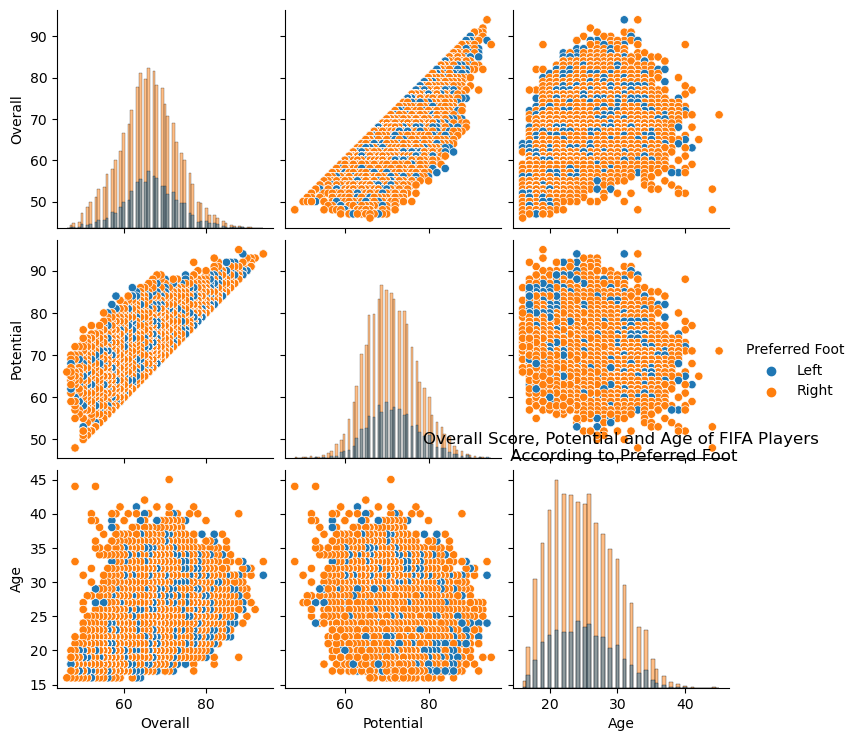

In [6]:
sns.pairplot(
    df,
    x_vars=["Overall", "Potential","Age"],
    y_vars=["Overall", "Potential","Age"],
    hue="Preferred Foot", # Just for fun
    diag_kind='hist'
)
#plt.title("Overall Score, Potential and Age of FIFA Players\n According to Preferred Foot")
plt.show()

